In [1]:
library(igraph)
library("data.table")
library(plyr)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
data<-fread("/Users/sonali/Desktop/EE232/Project5/Data/san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv", header=TRUE, sep=",",stringsAsFactors=FALSE)

In [3]:
typeof(data)
is.data.frame(data)
head(data)
# nrow(data)

[1] "list"

[1] TRUE

sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
434,906,10,188.09,116.06,168.73,1.54
1311,3,10,1300.10,377.45,1261.17,1.26
1736,2,10,805.12,344.87,744.22,1.47
560,2375,10,1627.73,533.35,1552.00,1.35
1628,2367,10,1228.89,452.52,1167.50,1.36
1938,1952,12,596.69,327.27,530.23,1.60


In [4]:
data_needed=data.frame(data$sourceid,data$dstid,data$month,data$mean_travel_time)
data_needed= subset(data_needed, data.month == "12")
data_needed=data.frame(data_needed$data.sourceid,data_needed$data.dstid,data_needed$data.mean_travel_time)
head(data_needed)
nrow(data_needed)

data_needed.data.sourceid,data_needed.data.dstid,data_needed.data.mean_travel_time
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


[1] 538998

In [5]:
colnames(data_needed) <- c("sourceid", "dstid","weight")
head(data_needed)
# data_check=data_needed[1:10,]
# data_check

sourceid,dstid,weight
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


In [6]:
g<-graph_from_data_frame(data_needed, directed=FALSE)

In [7]:
edge_attr(g)

In [8]:
is_weighted(g)

[1] TRUE

In [9]:
location<-fread("/Users/sonali/Desktop/EE232/Project5/Data/location.csv", header=TRUE, sep=",",stringsAsFactors=FALSE)
head(location)

properties.MOVEMENT_ID,properties.DISPLAY_NAME
1,"Sargent Creek, San Ardo"
2,"400 Northumberland Avenue, Redwood Oaks, Redwood City"
3,"18300 Sutter Boulevard, Morgan Hill"
4,"2700 Stoughton Way, Sheffield, Sacramento"
5,"3200 Huntsman Drive, Rosemont Park, Sacramento"
6,"100 Carlsbad Circle, Vacaville"


In [10]:
coordinates<-fread("/Users/sonali/Desktop/EE232/Project5/Data/coordinates.txt", header=FALSE, sep="\t",stringsAsFactors=FALSE)
head(coordinates)

V1,V2,V3
1,-120.7887,36.07163
2,-122.2194,37.46958
3,-121.6602,37.15048
4,-121.3428,38.57307
5,-121.3617,38.55443
6,-121.9484,38.36665


In [11]:
vector = c()

for(i in 1: length(V(g)))
{   vector[i]=location$properties.DISPLAY_NAME[location$properties.MOVEMENT_ID==get.vertex.attribute(g, "name",i)]
}


In [12]:
g<-set_vertex_attr(g, 'location', index = V(g), vector)
# g<-set_vertex_attr(g, 'location', index = V(g), c(location$properties.DISPLAY_NAME))

In [13]:
get.vertex.attribute(g)

$name
   [1] "1938" "1747" "1872" "1871" "81"   "1873" "232"  "1891" "2423" "650" 
  [11] "680"  "542"  "604"  "660"  "1329" "2421" "1736" "2021" "550"  "1721"
  [21] "1700" "176"  "536"  "74"   "288"  "169"  "99"   "1755" "646"  "2315"
  [31] "2322" "2307" "1390" "641"  "1946" "2357" "1454" "1729" "2355" "722" 
  [41] "612"  "98"   "1074" "1058" "614"  "151"  "2341" "1056" "1745" "1438"
  [51] "1473" "1469" "234"  "1098" "1457" "289"  "222"  "1059" "1448" "610" 
  [61] "1097" "1458" "1484" "315"  "1727" "251"  "388"  "1748" "544"  "1025"
  [71] "1856" "1726" "1296" "1749" "338"  "1066" "613"  "175"  "535"  "1451"
  [81] "2700" "687"  "809"  "387"  "859"  "1739" "1808" "818"  "1838" "738" 
  [91] "695"  "685"  "682"  "817"  "627"  "339"  "605"  "153"  "609"  "647" 
 [101] "645"  "272"  "284"  "1455" "397"  "1409" "876"  "1437" "131"  "2210"
 [111] "347"  "1759" "2147" "1359" "2187" "152"  "2113" "396"  "2146" "2155"
 [121] "2132" "277"  "1258" "369"  "52"   "2110" "1269" "2157" "1504" "1456"
 [131] "1526" "2111" "123"  "1259" "446"  "445"  "1514" "1170" "478"  "2401"
 [141] "431"  "1462" "2197" "286"  "1559" "1588" "1578" "452"  "2460" "225" 
 [151] "649"  "676"  "1298" "155"  "1515" "1120" "1533" "447"  "1542" "679" 
 [161] "1528" "1180" "2209" "1691" "678"  "1538" "448"  "597"  "1518" "950" 
 [171] "2530" "221"  "417"  "1100" "235"  "1910" "702"  "1284" "1051" "1925"
 [181] "1916" "2601" "2613" "1907" "2377" "2620" "1030" "1952" "488"  "1071"
 [191] "2370" "2643" "2603" "1933" "2316" "2582" "2313" "957"  "1906" "1050"
 [201] "2513" "1852" "1850" "2515" "2247" "2245" "2275" "1870" "1648" "1510"
 [211] "1649" "1511" "1932" "1981" "1928" "1951" "1014" "1934" "1054" "1923"
 [221] "2607" "1273" "1597" "11"   "104"  "1869" "119"  "2488" "47"   "1893"
 [231] "125"  "1875" "828"  "866"  "739"  "885"  "136"  "184"  "78"   "65"  
 [241] "886"  "541"  "79"   "154"  "2480" "434"  "537"  "468"  "651"  "464" 
 [251] "2169" "1921" "1930" "2218" "1300" "473"  "652"  "2534" "2535" "697" 
 [261] "487"  "698"  "1519" "623"  "1449" "699"  "2025" "2133" "2052" "2448"
 [271] "2588" "2495" "2496" "615"  "1439" "2135" "1452" "858"  "906"  "2454"
 [281] "304"  "964"  "893"  "467"  "563"  "2115" "908"  "963"  "829"  "1446"
 [291] "532"  "302"  "311"  "663"  "904"  "1338" "1333" "1387" "1335" "1321"
 [301] "1339" "2529" "624"  "1475" "2597" "1336" "296"  "2479" "1447" "285" 
 [311] "389"  "1255" "2489" "1305" "867"  "837"  "194"  "299"  "2212" "648" 
 [321] "1781" "608"  "1773" "1081" "1073" "217"  "528"  "209"  "1776" "1080"
 [331] "239"  "218"  "1206" "1920" "1209" "1688" "642"  "1706" "1357" "1687"
 [341] "1381" "1895" "1065" "1945" "1396" "1775" "1044" "2595" "1698" "1082"
 [351] "1302" "1516" "2136" "1311" "2347" "1571" "1740" "557"  "1761" "2308"
 [361] "103"  "165"  "2206" "9"    "1450" "1734" "168"  "843"  "939"  "1602"
 [371] "919"  "1574" "2490" "984"  "1743" "1453" "1525" "968"  "1512" "860" 
 [381] "864"  "986"  "1733" "1570" "2356" "1461" "1524" "2526" "2543" "826" 
 [391] "2504" "2673" "2236" "2523" "1031" "2215" "965"  "1467" "2374" "2500"
 [401] "2314" "2465" "2443" "2321" "2441" "2312" "2225" "1361" "1950" "1464"
 [411] "2304" "1752" "1780" "1783" "1904" "1750" "2628" "2332" "1903" "167" 
 [421] "1686" "1695" "1940" "1762" "1937" "1674" "1594" "87"   "2418" "1690"
 [431] "1830" "1944" "1911" "2170" "2171" "2074" "1331" "1922" "1935" "1942"
 [441] "1605" "2340" "1627" "1608" "1703" "1604" "1705" "1948" "1309" "1924"
 [451] "2485" "1470" "1771" "1660" "2120" "433"  "471"  "1656" "2221" "2222"
 [461] "724"  "1730" "2223" "1704" "629"  "718"  "1303" "2520" "1332" "1271"
 [471] "2519" "1237" "2239" "2229" "1024" "2670" "1732" "1046" "2686" "616" 
 [481] "611"  "725"  "743"  "2409" "1707" "2318" "1276" "2349" "1251" "2348"
 [491] "740"  "1724" "688"  "602"  "1596" "721"  "2438" "2656" "107"  "1235"
 [501] "742"  "762"  "1337" "2117" "1756" "1220" "1886" "1281" "1245" "1849"
 [511] "1210" "1625" "1722" "1723" "1702" "1248" "1277" "1048" "741

In [14]:

for(i in 1: length(V(g)))
{   vec=c()
    vec[1]=coordinates$V2[coordinates$V1==get.vertex.attribute(g, "name",i)]
    vec[2]=coordinates$V3[coordinates$V1==get.vertex.attribute(g, "name",i)]
#      print (vec[1])
#      print(vec[2])
    g <- set.vertex.attribute(g, 'coordinates', i, list(vec))
}

In [15]:
get.vertex.attribute(g)

$name
   [1] "1938" "1747" "1872" "1871" "81"   "1873" "232"  "1891" "2423" "650" 
  [11] "680"  "542"  "604"  "660"  "1329" "2421" "1736" "2021" "550"  "1721"
  [21] "1700" "176"  "536"  "74"   "288"  "169"  "99"   "1755" "646"  "2315"
  [31] "2322" "2307" "1390" "641"  "1946" "2357" "1454" "1729" "2355" "722" 
  [41] "612"  "98"   "1074" "1058" "614"  "151"  "2341" "1056" "1745" "1438"
  [51] "1473" "1469" "234"  "1098" "1457" "289"  "222"  "1059" "1448" "610" 
  [61] "1097" "1458" "1484" "315"  "1727" "251"  "388"  "1748" "544"  "1025"
  [71] "1856" "1726" "1296" "1749" "338"  "1066" "613"  "175"  "535"  "1451"
  [81] "2700" "687"  "809"  "387"  "859"  "1739" "1808" "818"  "1838" "738" 
  [91] "695"  "685"  "682"  "817"  "627"  "339"  "605"  "153"  "609"  "647" 
 [101] "645"  "272"  "284"  "1455" "397"  "1409" "876"  "1437" "131"  "2210"
 [111] "347"  "1759" "2147" "1359" "2187" "152"  "2113" "396"  "2146" "2155"
 [121] "2132" "277"  "1258" "369"  "52"   "2110" "1269" "2157" "1504" "1456"
 [131] "1526" "2111" "123"  "1259" "446"  "445"  "1514" "1170" "478"  "2401"
 [141] "431"  "1462" "2197" "286"  "1559" "1588" "1578" "452"  "2460" "225" 
 [151] "649"  "676"  "1298" "155"  "1515" "1120" "1533" "447"  "1542" "679" 
 [161] "1528" "1180" "2209" "1691" "678"  "1538" "448"  "597"  "1518" "950" 
 [171] "2530" "221"  "417"  "1100" "235"  "1910" "702"  "1284" "1051" "1925"
 [181] "1916" "2601" "2613" "1907" "2377" "2620" "1030" "1952" "488"  "1071"
 [191] "2370" "2643" "2603" "1933" "2316" "2582" "2313" "957"  "1906" "1050"
 [201] "2513" "1852" "1850" "2515" "2247" "2245" "2275" "1870" "1648" "1510"
 [211] "1649" "1511" "1932" "1981" "1928" "1951" "1014" "1934" "1054" "1923"
 [221] "2607" "1273" "1597" "11"   "104"  "1869" "119"  "2488" "47"   "1893"
 [231] "125"  "1875" "828"  "866"  "739"  "885"  "136"  "184"  "78"   "65"  
 [241] "886"  "541"  "79"   "154"  "2480" "434"  "537"  "468"  "651"  "464" 
 [251] "2169" "1921" "1930" "2218" "1300" "473"  "652"  "2534" "2535" "697" 
 [261] "487"  "698"  "1519" "623"  "1449" "699"  "2025" "2133" "2052" "2448"
 [271] "2588" "2495" "2496" "615"  "1439" "2135" "1452" "858"  "906"  "2454"
 [281] "304"  "964"  "893"  "467"  "563"  "2115" "908"  "963"  "829"  "1446"
 [291] "532"  "302"  "311"  "663"  "904"  "1338" "1333" "1387" "1335" "1321"
 [301] "1339" "2529" "624"  "1475" "2597" "1336" "296"  "2479" "1447" "285" 
 [311] "389"  "1255" "2489" "1305" "867"  "837"  "194"  "299"  "2212" "648" 
 [321] "1781" "608"  "1773" "1081" "1073" "217"  "528"  "209"  "1776" "1080"
 [331] "239"  "218"  "1206" "1920" "1209" "1688" "642"  "1706" "1357" "1687"
 [341] "1381" "1895" "1065" "1945" "1396" "1775" "1044" "2595" "1698" "1082"
 [351] "1302" "1516" "2136" "1311" "2347" "1571" "1740" "557"  "1761" "2308"
 [361] "103"  "165"  "2206" "9"    "1450" "1734" "168"  "843"  "939"  "1602"
 [371] "919"  "1574" "2490" "984"  "1743" "1453" "1525" "968"  "1512" "860" 
 [381] "864"  "986"  "1733" "1570" "2356" "1461" "1524" "2526" "2543" "826" 
 [391] "2504" "2673" "2236" "2523" "1031" "2215" "965"  "1467" "2374" "2500"
 [401] "2314" "2465" "2443" "2321" "2441" "2312" "2225" "1361" "1950" "1464"
 [411] "2304" "1752" "1780" "1783" "1904" "1750" "2628" "2332" "1903" "167" 
 [421] "1686" "1695" "1940" "1762" "1937" "1674" "1594" "87"   "2418" "1690"
 [431] "1830" "1944" "1911" "2170" "2171" "2074" "1331" "1922" "1935" "1942"
 [441] "1605" "2340" "1627" "1608" "1703" "1604" "1705" "1948" "1309" "1924"
 [451] "2485" "1470" "1771" "1660" "2120" "433"  "471"  "1656" "2221" "2222"
 [461] "724"  "1730" "2223" "1704" "629"  "718"  "1303" "2520" "1332" "1271"
 [471] "2519" "1237" "2239" "2229" "1024" "2670" "1732" "1046" "2686" "616" 
 [481] "611"  "725"  "743"  "2409" "1707" "2318" "1276" "2349" "1251" "2348"
 [491] "740"  "1724" "688"  "602"  "1596" "721"  "2438" "2656" "107"  "1235"
 [501] "742"  "762"  "1337" "2117" "1756" "1220" "1886" "1281" "1245" "1849"
 [511] "1210" "1625" "1722" "1723" "1702" "1248" "1277" "1048" "741

In [17]:
cl<-clusters(g)
largest_g<-induced.subgraph(g, which(cl$membership == which.max(cl$csize)))


In [ ]:
# plot(largest_g)

In [18]:
ecount(largest_g)
vcount(largest_g)
# get.edge.attribute(largest_g)
# largest_g<- largest_g + edge(1, 3)
# get.edge.attribute(largest_g)

[1] 538984

[1] 1880

In [382]:
# simplify(largest_g, edge.attr.comb=list(weight=function(x) sum(x)/length(x),name="ignore"))

In [19]:
largest_g<-simplify(largest_g, edge.attr.comb="mean",remove.multiple=TRUE)

In [20]:
ecount(largest_g)
vcount(largest_g)

[1] 311802

[1] 1880

In [21]:
####check
head(data_needed)
check= subset(data_needed, sourceid == "1938")
head(check)
check1= subset(data_needed, dstid == "1938")
head(check1)
largest_g["1938"]

sourceid,dstid,weight
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


,sourceid,dstid,weight
1,1938,1952,596.69
4005,1938,1308,1393.58
9388,1938,2631,97.01
10876,1938,875,770.29
16593,1938,1907,855.57
16874,1938,564,759.39


,sourceid,dstid,weight
2008,1385,1938,1184.42
4239,1308,1938,1525.33
5091,875,1938,779.62
7386,2631,1938,122.24
11547,1952,1938,545.75
31810,697,1938,1275.54


1938     1747     1872     1871       81     1873      232     1891 
   0.000 2923.590 1170.225    0.000    0.000  335.670 1987.670  843.330 
    2423      650      680      542      604      660     1329     2421 
   0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000 
    1736     2021      550     1721     1700      176      536       74 
   0.000    0.000  892.730 2144.860    0.000  973.300    0.000 1004.770 
     288      169       99     1755      646     2315     2322     2307 
   0.000    0.000    0.000 2681.460    0.000    0.000    0.000    0.000 
    1390      641     1946     2357     1454     1729     2355      722 
   0.000    0.000  393.265    0.000    0.000 3097.180    0.000 1263.340 
     612       98     1074     1058      614      151     2341     1056 
   0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000 
    1745     1438     1473     1469      234     1098     1457      289 
   0.000    0.000    0.000    0.000 3334.930    0.000    0.000    0.000 
     222     1059     1448      610     1097     1458     1484      315 
   0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000 
    1727      251      388     1748      544     1025     1856     1726 
   0.000  635.845    0.000    0.000 1312.800    0.000  878.860    0.000 
    1296     1749      338     1066      613      175      535     1451 
   0.000    0.000 2306.820    0.000    0.000 1239.085    0.000    0.000 
    2700      687      809      387      859     1739     1808      818 
   0.000 1229.160    0.000    0.000    0.000    0.000    0.000 2274.250 
    1838      738      695      685      682      817      627      339 
   0.000    0.000 1037.830    0.000 2803.230 2585.760    0.000    0.000 
     605      153      609      647      645      272      284     1455 
   0.000 1553.125    0.000    0.000    0.000 1012.080    0.000 2854.290 
     397     1409      876     1437      131     2210      347     1759 
   0.000    0.000  439.325    0.000  832.915    0.000    0.000    0.000 
    2147     1359     2187      152     2113      396     2146     2155 
 766.750    0.000    0.000    0.000    0.000  890.575 1407.540 1634.500 
    2132      277     1258      369       52     2110     1269     2157 
   0.000    0.000    0.000    0.000 1043.750    0.000 1396.420    0.000 
    1504     1456     1526     2111      123     1259      446      445 
   0.000    0.000    0.000    0.000 1619.445    0.000    0.000    0.000 
    1514     1170      478     2401      431     1462     2197      286 
   0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000 
    1559     1588     1578      452     2460      225      649      676 
   0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000 
    1298      155     1515     1120     1533      447     1542      679 
   0.000 1542.435    0.000    0.000    0.000    0.000    0.000    0.000 
    1528     1180     2209     1691      678     1538      448      597 
   0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000 
    1518      950     2530      221      417     1100      235     1910 
   0.000    0.000    0.000    0.000    0.000    0.000  908.225    0.000 
     702     1284     1051     1925     1916     2601     2613     1907 
 799.680 1210.370    0.000 1220.095    0.000    0.000 2757.220  764.455 
    2377     2620     1030     1952      488     1071     2370     2643 
   0.000    0.000    0.000  571.220    0.000    0.000    0.000    0.000 
    2603     1933     2316     2582     2313      957     1906     1050 
   0.000 1445.940    0.000    0.000    0.000 2046.020  775.910    0.000 
    2513     1852     1850     2515     2247     2245     2275     1870 
2014.450    0.000    0.000 1003.670    0.000    0.000    0.000 1366.200 
    1648     1510     1649     1511     1932     1981     1928     1951 
   0.000    0.000    0.000    0.000    0.000    0.000  849.265    0.000 
    1014     1934     1054     1923     2607     1273     1597

In [22]:
##Q7
#is_weighted(largest_g)
#g_mst1 <- mst(largest_g,weights=get.edge.attribute(largest_g, "weight"))
g_mst<-mst(largest_g)

IGRAPH d922856 UNW- 1880 1879 -- 
+ attr: name (v/c), location (v/c), coordinates (v/x), weight (e/n)
+ edges from d922856 (vertex names):
 [1] 1938--1241 1938--700  1938--2631 1747--1455 1747--528  1747--1746
 [7] 1872--563  1871--563  1871--1381 1871--390  81  --1701 81  --1295
[13] 81  --1772 1873--2488 232 --2155 232 --2513 1891--1868 2423--169 
[19] 2423--387  2423--602  2423--1086 650 --1703 650 --206  680 --1748
[25] 680 --1461 542 --2700 542 --2503 542 --543  604 --1595 604 --1102
[31] 660 --1296 660 --1776 660 --967  1329--1311 1329--824  2421--2225
[37] 2421--2214 1736--2251 1736--1737 2021--1180 2021--2066 550 --702 
[43] 550 --1660 1721--1473 1721--1724 1721--394  1700--207  1700--1699
+ ... omitted several edges

In [485]:

#for (i in 1:5)
#{
#    
#}
E(g_mst)[1]


+ 1/1879 edge from d922856 (vertex names):
  tail head tid hid weight
1 1938 1241   1 523 132.59

In [477]:
which(V(g_mst)$name == "1938")
which(V(g_mst)$name == "1241")

[1] 1

[1] 523

In [479]:
get.vertex.attribute(g_mst,"location",1)
get.vertex.attribute(g_mst,"location",523)

[1] "3300 Brodie Drive, South San Jose, San Jose"

[1] "4300 La Torre Avenue, South San Jose, San Jose"

In [486]:
E(g_mst)[[2]]

+ 1/1879 edge from d922856 (vertex names):
  tail head tid  hid weight
2 1938  700   1 1266 126.24

In [481]:
which(V(g_mst)$name == "1938")
which(V(g_mst)$name == "700")

[1] 1

[1] 1266

In [482]:
get.vertex.attribute(g_mst,"location",1)
get.vertex.attribute(g_mst,"location",1266)

[1] "3300 Brodie Drive, South San Jose, San Jose"

[1] "3700 McLaughlin Avenue, South San Jose, San Jose"

In [487]:
E(g_mst)[[3]]

+ 1/1879 edge from d922856 (vertex names):
  tail head tid  hid  weight
3 1938 2631   1 1286 109.625

In [488]:
which(V(g_mst)$name == "1938")
which(V(g_mst)$name == "2631")

[1] 1

[1] 1286

In [497]:
get.vertex.attribute(g_mst,"location",1)
get.vertex.attribute(g_mst,"location",1286)

[1] "3300 Brodie Drive, South San Jose, San Jose"

[1] "400 Ginkgo Court, South San Jose, San Jose"

In [498]:
E(g_mst)[4]

+ 1/1879 edge from d922856 (vertex names):
[1] 1747--1455

In [682]:
E(g_mst)[10]
which(V(g_mst)$name == "1871")
which(V(g_mst)$name == "390")
get.vertex.attribute(g_mst,"location",4)
get.vertex.attribute(g_mst,"location",558)

+ 1/1879 edge from d922856 (vertex names):
[1] 1871--390

[1] 4

[1] 558

[1] "1400 Calle Alegre, South San Jose, San Jose"

[1] "5600 Park Crest Drive, South San Jose, San Jose"

In [23]:
##Q8

list_triangles<-triangles(largest_g)

In [24]:
list_triangles

+ 95036715/1880 vertices, named, from 3514094:
    [1] 234  1938 353  234  1938 1888 234  1938 2676 234  1938 1943 234  1938
   [15] 821  234  1938 1926 234  1938 2631 234  1938 566  234  1938 2522 234 
   [29] 1938 703  234  1938 701  234  1938 929  234  1938 2149 234  1938 2524
   [43] 234  1938 2151 234  1938 2150 234  1938 1249 234  1938 565  234  1938
   [57] 2402 234  1938 918  234  1938 977  234  1938 1388 234  1938 1876 234 
   [71] 1938 2153 234  1938 132  234  1938 390  234  1938 2147 234  1938 1887
   [85] 234  1938 1886 234  1938 1942 234  1938 1950 234  1938 2523 234  1938
   [99] 1387 234  1938 1870 234  1938 2515 234  1747 1938 234  1747 1872 234 
  [113] 1747 1871 234  1747 81   234  1747 1873 234  1747 232  234  1747 1891
  [127] 234  1747 2423 234  1747 650  234  1747 680  234  1747 542  234  1747
+ ... omitted several vertices

In [534]:
list_triangles<-as.vector(list_triangles)

In [554]:
length(list_triangles)/3

[1] 31678905

In [25]:
i=1
count = 0
ans=0
while(count < 1000)
{   i=sample(1:31678904, 1)
    i=i*3
    v1=list_triangles[[i+1]]
    v2=list_triangles[[i+2]]
    v3=list_triangles[[i+3]]
    e1=get.edge.ids(largest_g,c(v1,v2))
    e2=get.edge.ids(largest_g,c(v2,v3))
    e3=get.edge.ids(largest_g,c(v1,v3))
    #print(v1,v2,v3,e1,e2,e3)
    w1=get.edge.attribute(largest_g,"weight",e1)
    w2=get.edge.attribute(largest_g,"weight",e2)
    w3=get.edge.attribute(largest_g,"weight",e3)
    #print(w1)
    #print(w2)
    #print(w3)
    if((w1<(w2+w3))&&(w2<(w1+w3))&&(w3<(w1+w2)))
    {
     ans=ans+1   
    }
    i=i+3
    count=count+1
}

In [556]:
count
ans

[1] 1000

[1] 912

In [557]:
(ans)/count

[1] 0.912

In [26]:
##Q9

#1.get mst of graph
g_mst

IGRAPH a7497c1 UNW- 1880 1879 -- 
+ attr: name (v/c), location (v/c), coordinates (v/x), weight (e/n)
+ edges from a7497c1 (vertex names):
 [1] 1938--1241 1938--700  1938--2631 1747--1455 1747--528  1747--1746
 [7] 1872--563  1871--563  1871--1381 1871--390  81  --1701 81  --1295
[13] 81  --1772 1873--2488 232 --2155 232 --2513 1891--1868 2423--169 
[19] 2423--387  2423--602  2423--1086 650 --1703 650 --206  680 --1748
[25] 680 --1461 542 --2700 542 --2503 542 --543  604 --1595 604 --1102
[31] 660 --1296 660 --1776 660 --967  1329--1311 1329--824  2421--2225
[37] 2421--2214 1736--2251 1736--1737 2021--1180 2021--2066 550 --702 
[43] 550 --1660 1721--1473 1721--1724 1721--394  1700--207  1700--1699
+ ... omitted several edges

In [27]:
#2. Do dfs 
dfs_res<-dfs(g_mst,root=1,neimode=c("total"))

In [28]:
#3. preorder traversal, add 1 at end
preorder<-dfs_res$order
preorder_ids=as.vector(preorder)
preorder_ids=c(preorder_ids,1)
#preorder_ids

In [30]:
#find paths for 2-approx
actual_path=c()
actual_path=c(actual_path,preorder_ids[1])
approx_w=0
#(length(preorder_ids)-1)
for (i in 1:(length(preorder_ids)-1))
{
    e=get.edge.ids(largest_g,c(preorder_ids[i],preorder_ids[i+1]))
    w=get.edge.attribute(largest_g,"weight",e)
    
    if(length(w)!=0 && w!=0)
    {
        actual_path=c(actual_path,preorder_ids[i+1])
        approx_w=approx_w + w
        
    }
    else
    {
        x<-get.shortest.paths(largest_g, preorder_ids[i], to=preorder_ids[i+1], mode = c("all"))$vpath
        x<-as.vector(x[[1]])
        actual_path=c(actual_path,x[2:length(x)])
        for(j in 1: (length(x)-1))
        {
    
            e=get.edge.ids(largest_g,c(x[j],x[j+1]))
            w=get.edge.attribute(largest_g,"weight",e)
            approx_w=approx_w + w
            #print(j)
            #print(approx_w)
        }
        #print("here")
        #print(i)
    }

    #print(approx_w)
}
print(approx_w)
# print(actual_path)

[1] 464758.3


In [31]:
#optimal weights
opt_weight=0
for(i in 1: length(E(g_mst)))
{
opt_weight=opt_weight+E(g_mst)[i]$weight
#print(opt_weight)
}
print(opt_weight)

[1] 279408.2


In [32]:
approx_w/opt_weight

[1] 1.663367

In [ ]:
#e=get.edge.ids(largest_g,c(preorder_ids[76],preorder_ids[77]))
# print(e)
#     w=get.edge.attribute(largest_g,"weight",e)
# print(w)
# get.vertex.attribute(largest_g,"name",preorder_ids[76])
# get.vertex.attribute(largest_g,"name",preorder_ids[77])
# largest_g["1980"]
# x<-get.shortest.paths(largest_g, preorder_ids[76], to=preorder_ids[77], mode = c("all"))$vpath
# x<-as.vector(x[[1]])
# x
# path=c(path,x[2:length(x)])
# print(path)
# preorder_ids[77]
# x[1]
# x
# for(j in 1: (length(x)-1))
# {
    
#     e=get.edge.ids(largest_g,c(x[j],x[j+1]))
#     w=get.edge.attribute(largest_g,"weight",e)
#     approx_w=approx_w + w
#     #print(j)
#     print(approx_w)
# }

In [630]:
#Q10
V(largest_g)[actual_path[1]]$coordinates

[[1]]
[1] -121.82174   37.29051

In [634]:
V(largest_g)[actual_path[1]]$coordinates[[1]][2]

[1] 37.29051

In [41]:
x_plot=c()
y_plot=c()
for(i in 1:length(actual_path))
{

    x_plot=c(x_plot,V(largest_g)[actual_path[i]]$coordinates[[1]][1])
    y_plot=c(y_plot,V(largest_g)[actual_path[i]]$coordinates[[1]][2])
}

In [42]:
length(x_plot)
length(y_plot)
length(actual_path)

[1] 1981

[1] 1981

[1] 1981

In [43]:
V(largest_g)[actual_path[1980]]$coordinates[[1]][1]

[1] -121.8387

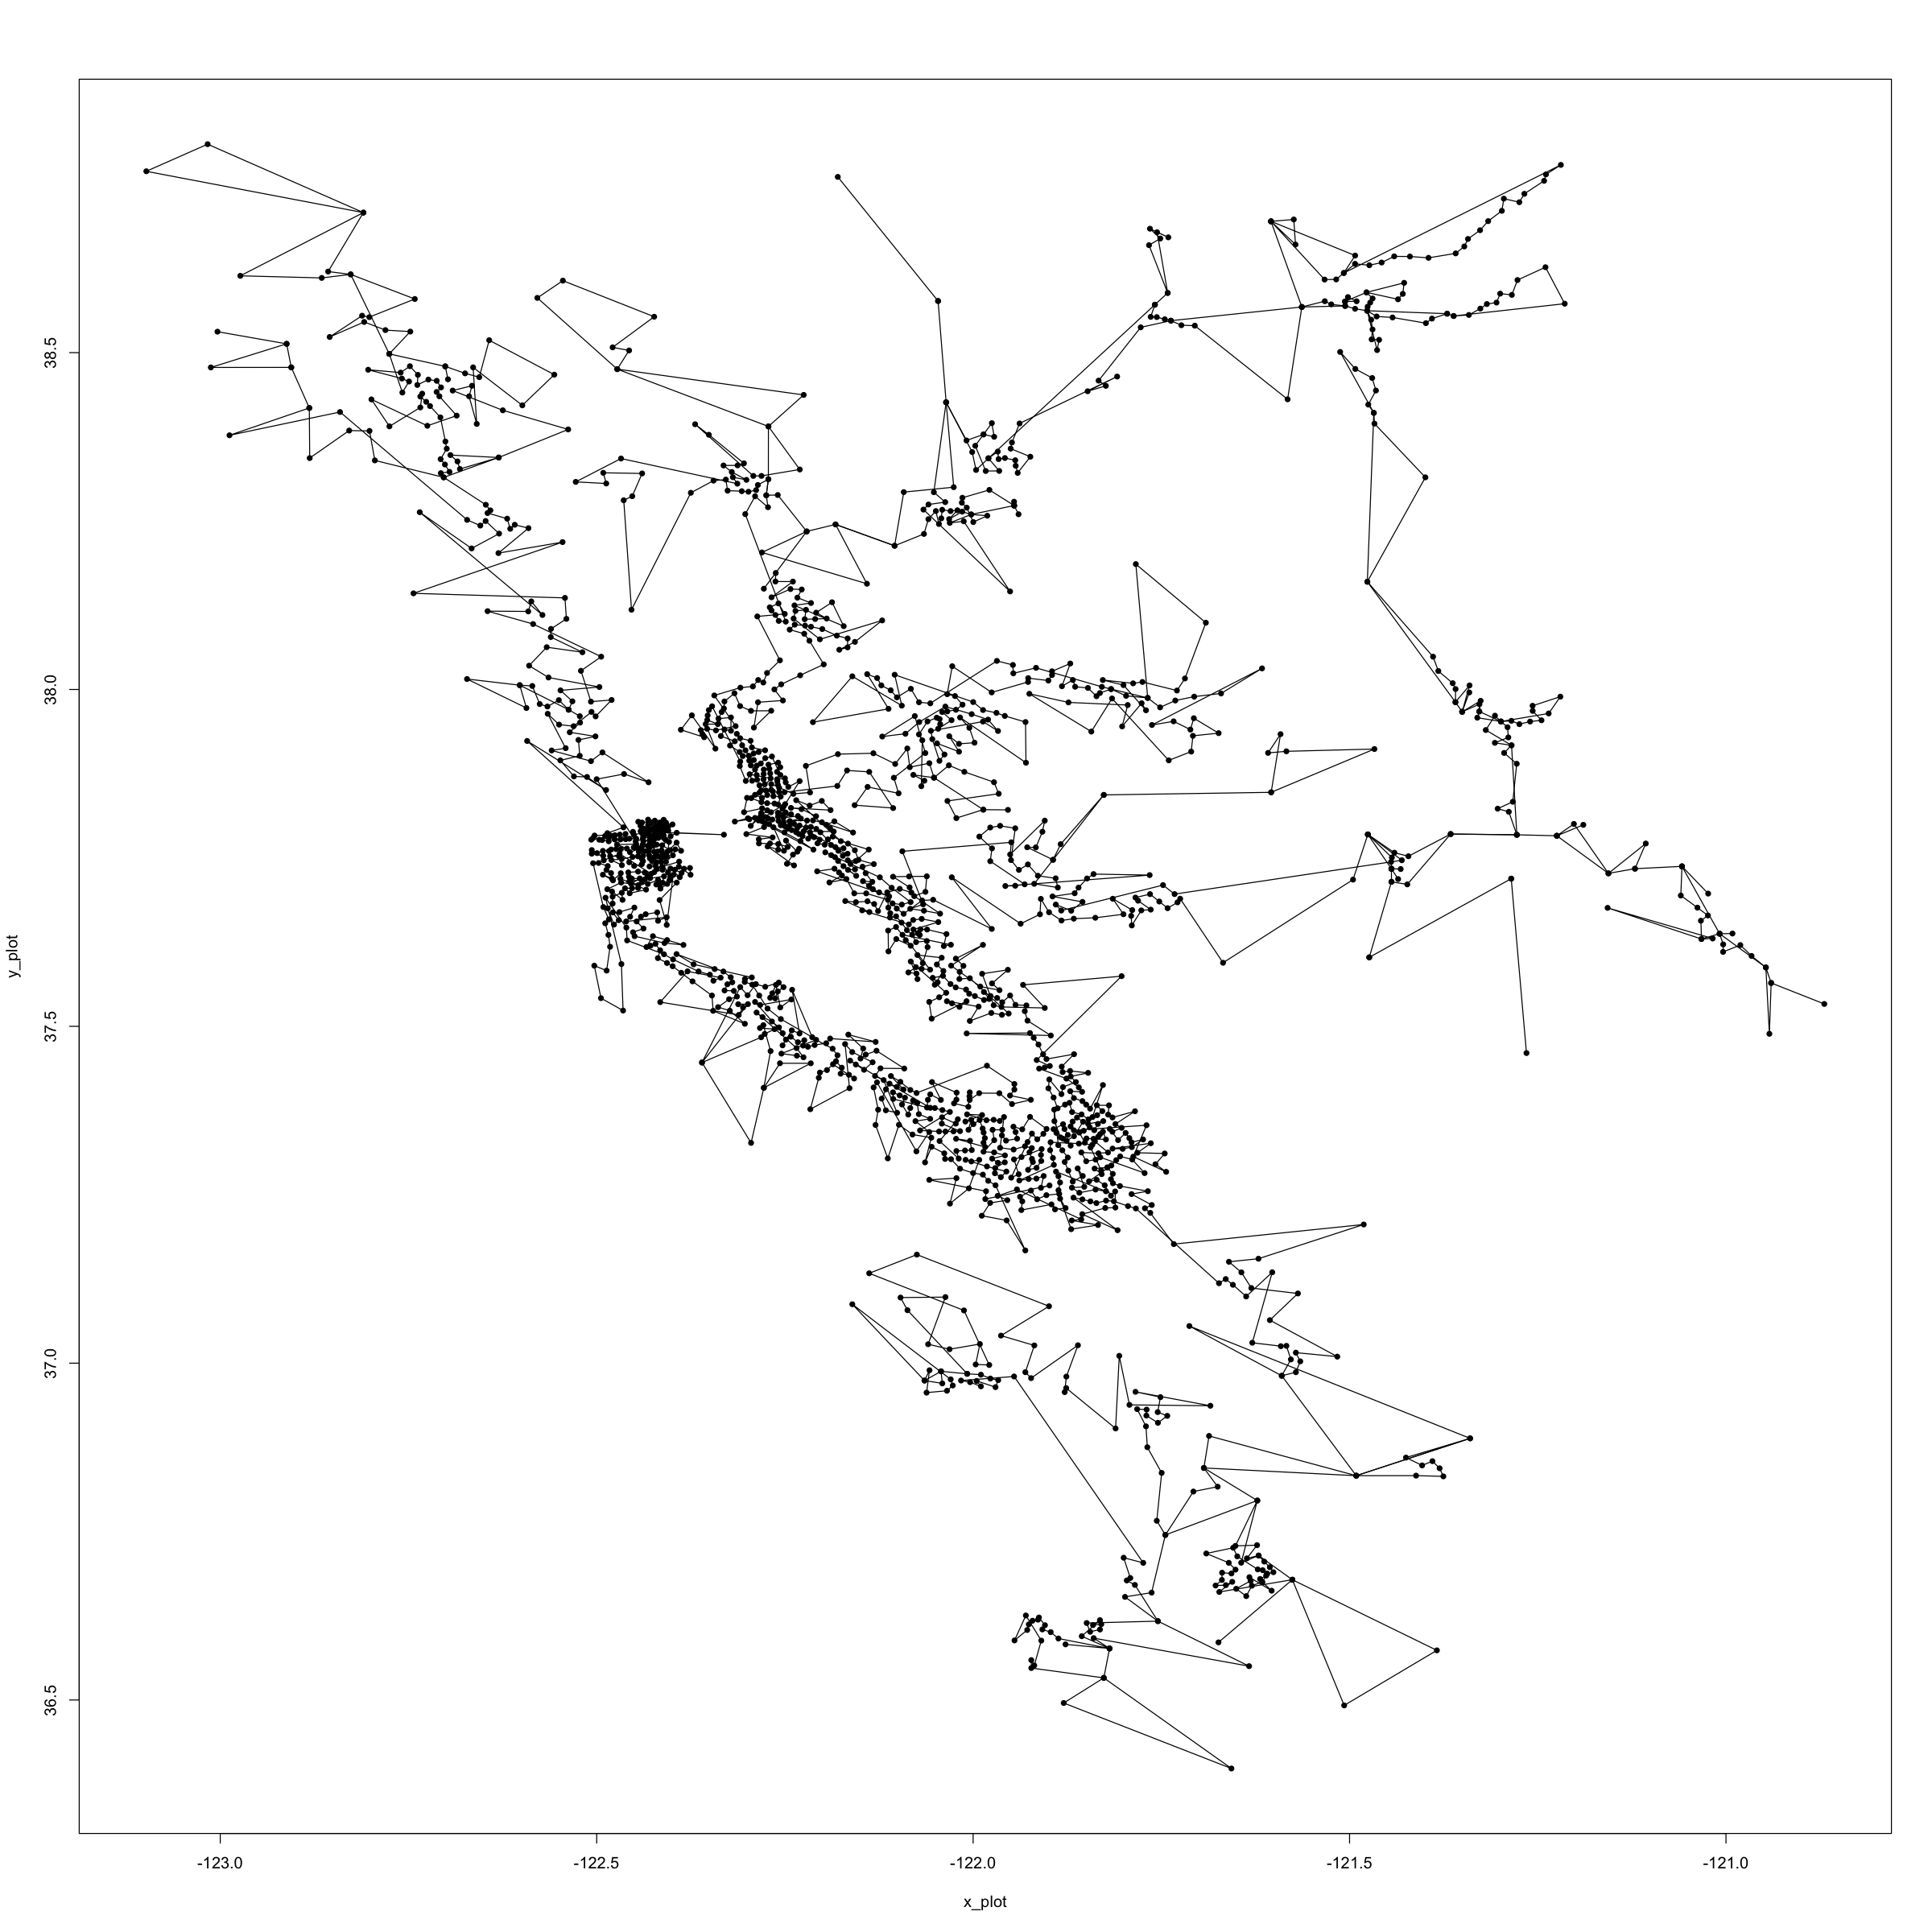

In [44]:
library("repr")
options(repr.plot.width=20, repr.plot.height=20)


plot(x_plot,y_plot, pch=20)
lines(x_plot,y_plot)

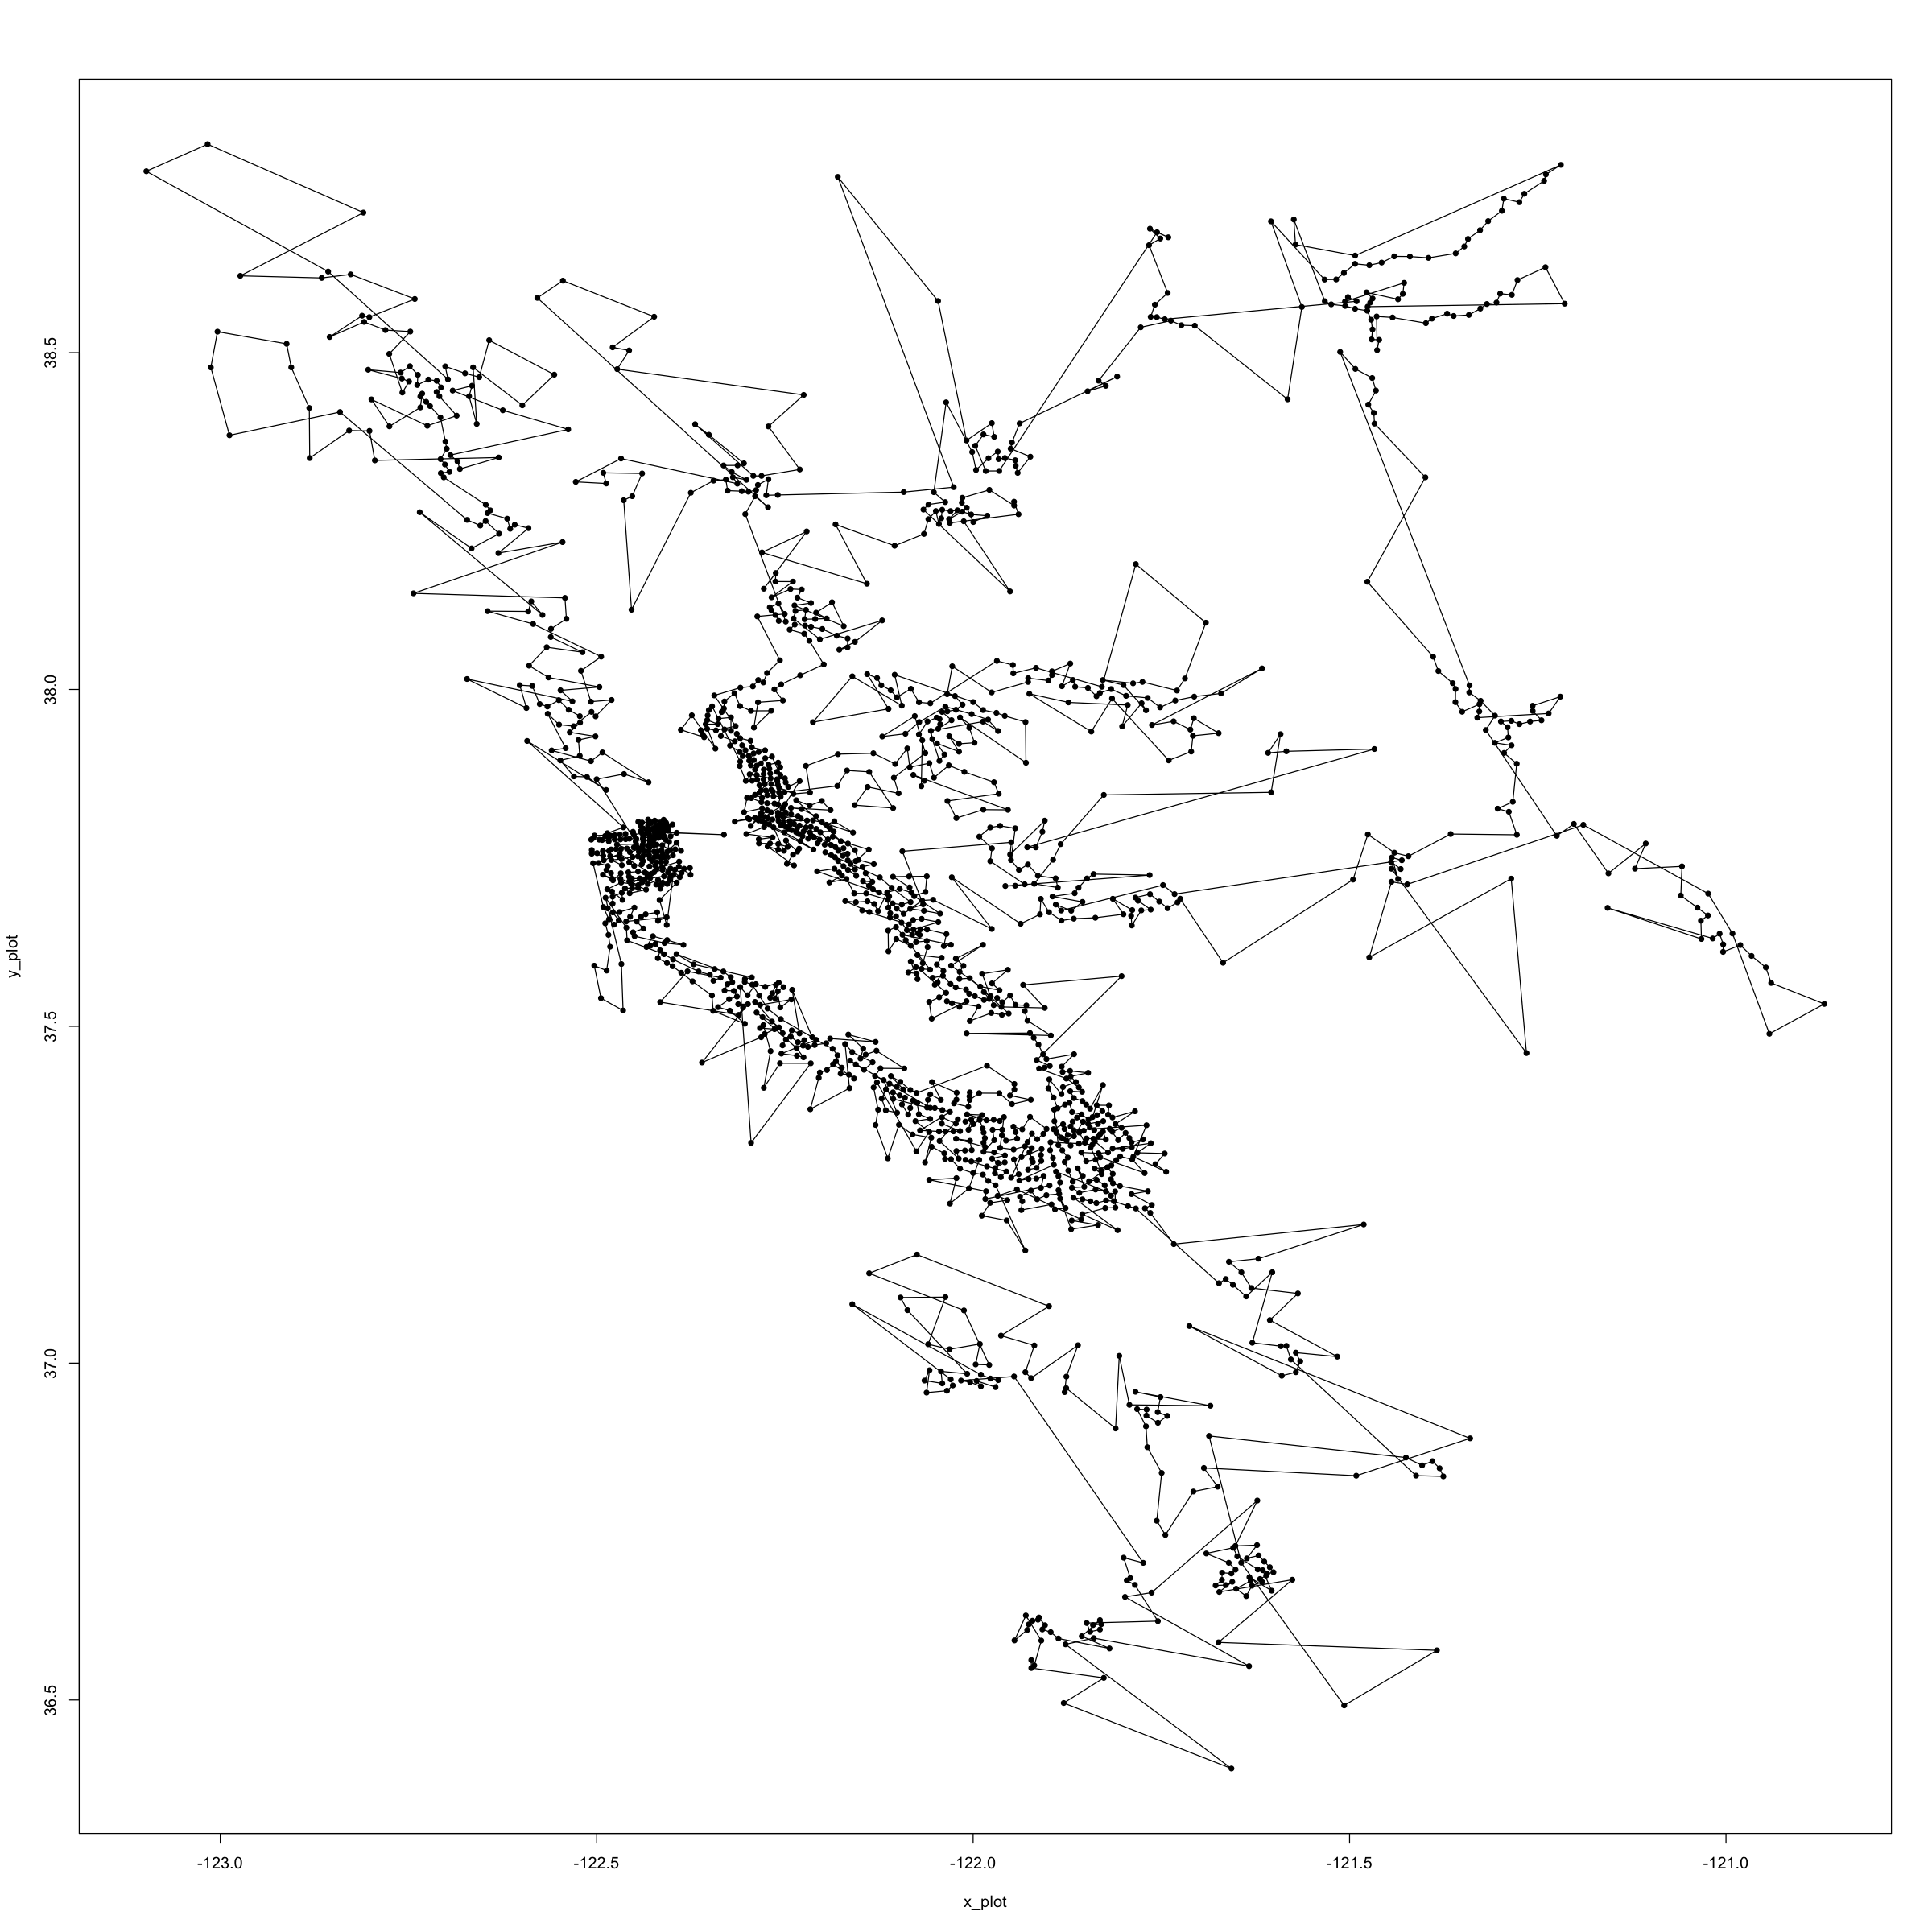

In [40]:

x_plot=c()
y_plot=c()
for(i in 1:length(preorder_ids))
{

    x_plot=c(x_plot,V(largest_g)[preorder_ids[i]]$coordinates[[1]][1])
    y_plot=c(y_plot,V(largest_g)[preorder_ids[i]]$coordinates[[1]][2])
}
options(repr.plot.width=20, repr.plot.height=20)

plot(x_plot,y_plot, pch=20)
lines(x_plot,y_plot)

In [672]:
is_weighted(g_mst)

[1] TRUE

In [46]:
# actual_path=c()
# actual_path=c(actual_path,preorder_ids[76])
# approx_w=0
# #(length(preorder_ids)-1)
# for (i in 1:(length(preorder_ids)-1))
# {
#     e=get.edge.ids(largest_g,c(preorder_ids[i],preorder_ids[i+1]))
#     w=get.edge.attribute(largest_g,"weight",e)
#      print(preorder_ids[i])
#      print(preorder_ids[i+1])
#     if(length(w)!=0 && w!=0)
#     {
#         print("weight there")
#         print(actual_path)
#         actual_path=c(actual_path,preorder_ids[i+1])
#         print(actual_path)
#         approx_w=approx_w + w
        
#     }
#     else
#     {   print("here")
        
#         x<-get.shortest.paths(largest_g, preorder_ids[i], to=preorder_ids[i+1], mode = c("all"))$vpath
     
#         x<-as.vector(x[[1]])
#         print(x)
#      print(actual_path)
#     actual_path=c(actual_path,x[2:length(x)])
#      print(actual_path)
#         for(j in 1: (length(x)-1))
#         {
#             #print(x[j])
#             #print(x[j+1])
#             e=get.edge.ids(largest_g,c(x[j],x[j+1]))
#             w=get.edge.attribute(largest_g,"weight",e)
#             #actual_path=c(actual_path,x[j+1])
#             approx_w=approx_w + w
#             #print(j)
#             #print(approx_w)
#         }
#        print("done")
#         #print(i)
#     }

#     #print(approx_w)
# }
# print(approx_w)

In [45]:
# x_plot=c()
# y_plot=c()
# for(i in 1:length(actual_path))
# {

#     x_plot=c(x_plot,V(largest_g)[actual_path[i]]$coordinates[[1]][1])
#     y_plot=c(y_plot,V(largest_g)[actual_path[i]]$coordinates[[1]][2])
# }
# length(x_plot)
# length(y_plot)
# length(actual_path)
# plot(x_plot,y_plot)
# lines(x_plot,y_plot)

In [691]:
actual_path[1981]

[1] 1

In [693]:
x_plot[1]
y_plot[1]

[1] -121.8217

[1] 37.29051

In [694]:
x_plot[1981]
y_plot[1981]

[1] -121.8217

[1] 37.29051